In [2]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import binom
import matplotlib.pyplot as plt
import scienceplots
from dotenv import load_dotenv

In [3]:
# def plot_results(df, 'var', ax, legends[i], markers[i], colors[i]):
def plot_results(df, fill_metric, ax, _legend, _marker, _color, _linestyle='-', _markersize=6):
    array = df.to_numpy()
    
    mean = np.median(array, axis=1)
    x = np.arange(len(mean))
    ax.plot(x, mean, label=_legend, marker=_marker, color=_color, linestyle=_linestyle, markersize=_markersize)

    if fill_metric=='minmax':
        min = np.min(array, axis=1)
        max = np.max(array, axis=1)
        ax.fill_between(x, min, max, color=_color, alpha=0.1)
        
    elif fill_metric=='var':
        var = np.var(array, axis=1)
        ax.fill_between(x, mean-var*1, mean+var*1, color=_color, alpha=0.2)
    
    elif fill_metric=='std':
        std = np.std(array, axis=1)
        ax.fill_between(x, mean-std, mean+std, color=_color, alpha=0.2)

### single-linkage, cosine-sim, p=0

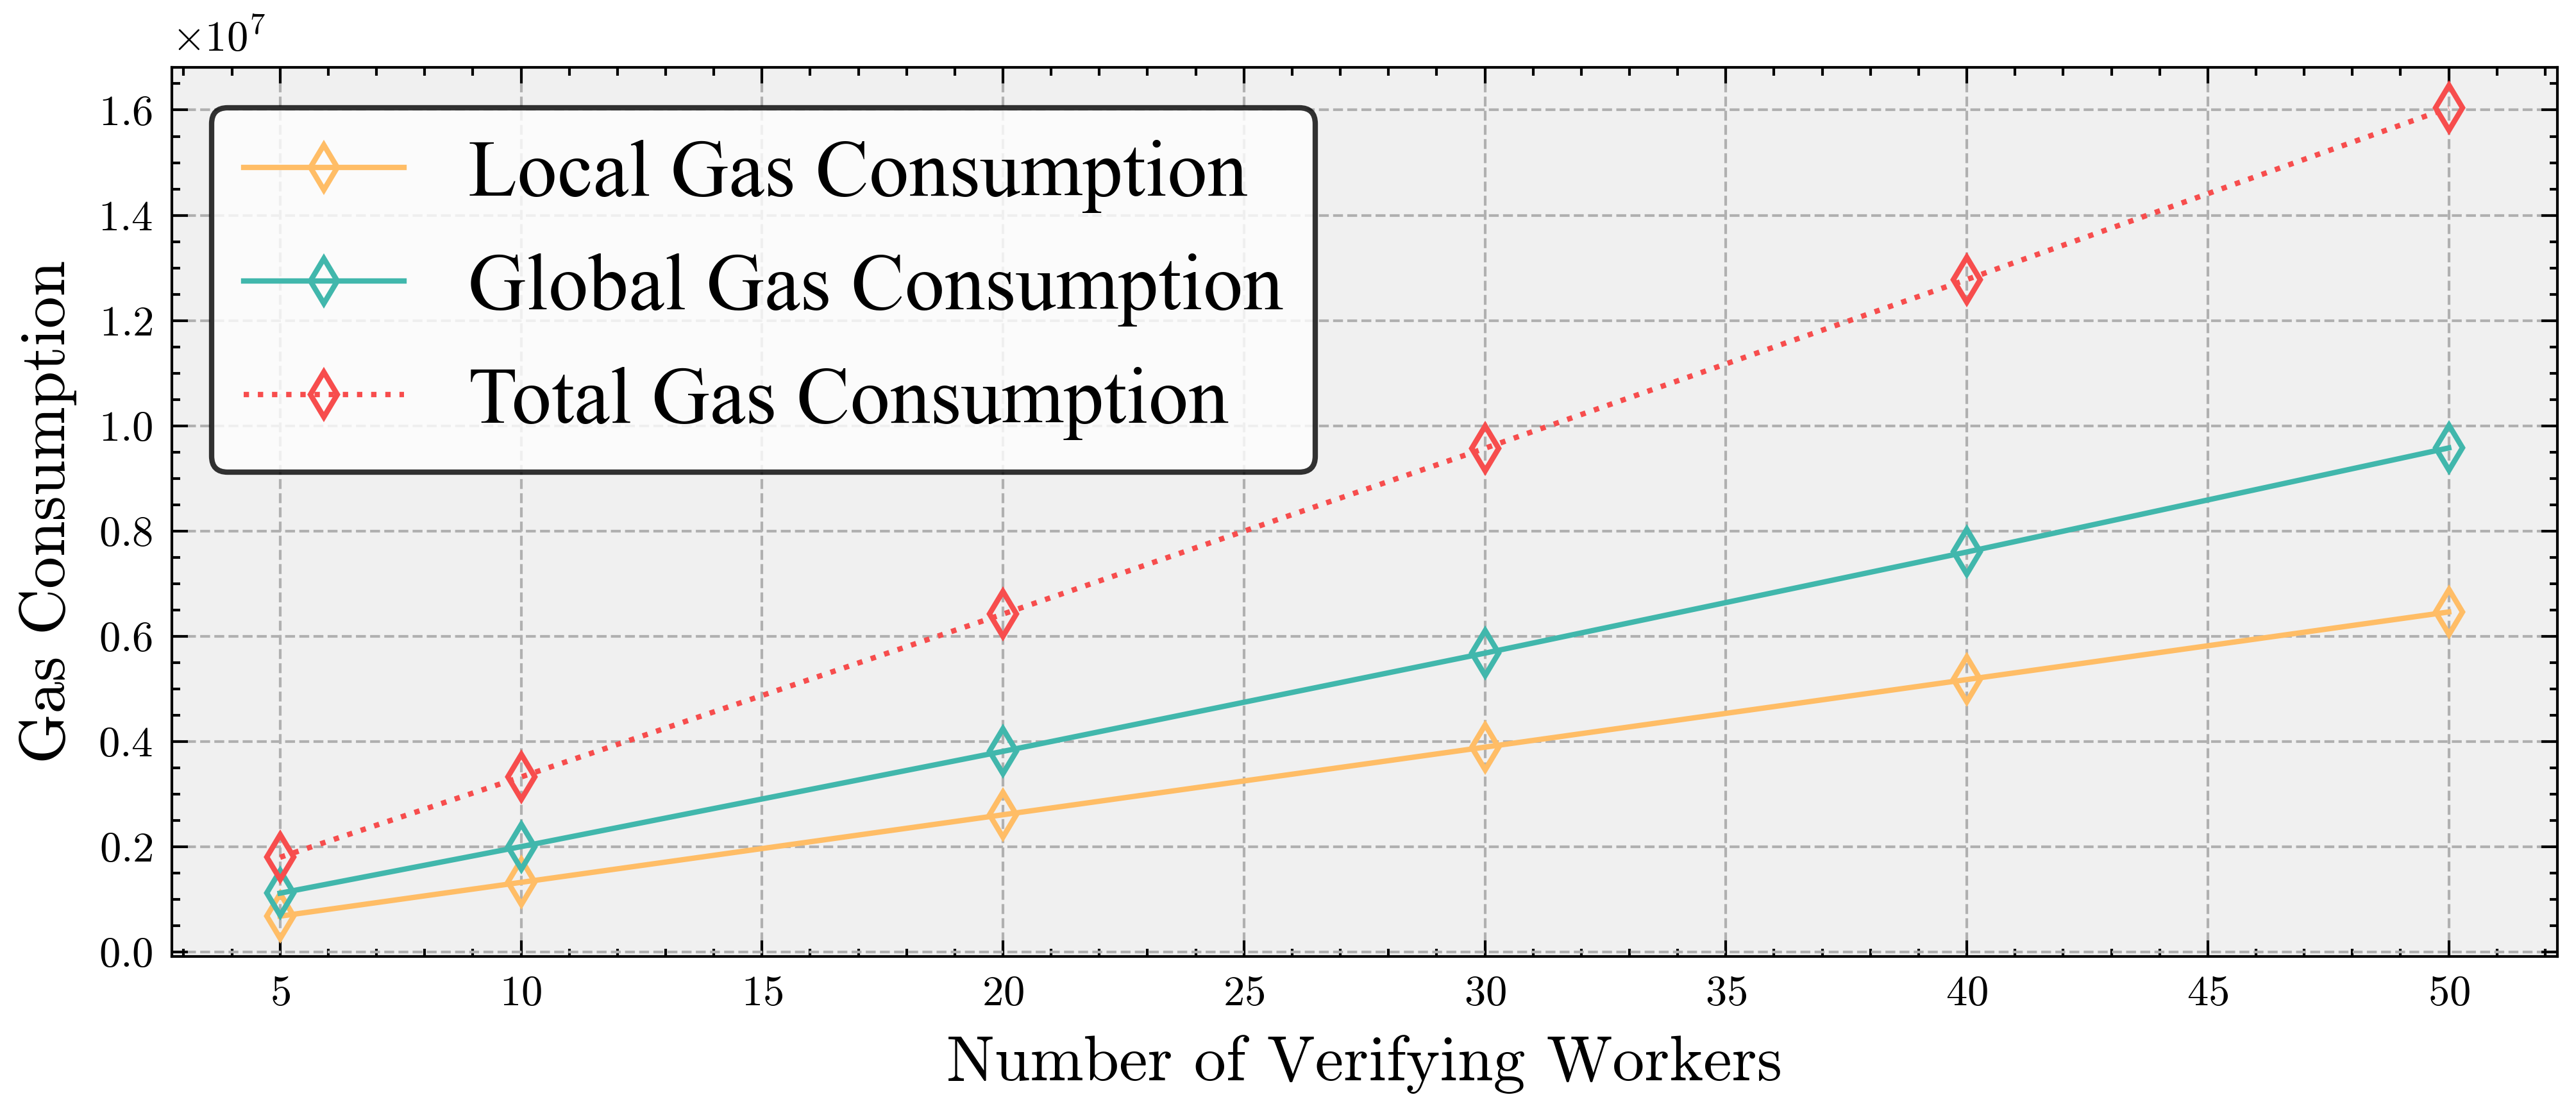

In [6]:
num_signatures = [5, 10, 20, 30, 40, 50]
local_gas = [681297, 1323509, 2608064, 3892632, 5177215, 6461811]
global_gas = [1117957, 2002305, 3812788, 5679038, 7601149, 9578955]
total_gas = [l + g for l, g in zip(local_gas, global_gas)]

# plotting configuration
lines = [
    {
        "data": local_gas,
        "color": "#ffbd66",
        "marker": "d",
        "legend": "Local Gas Consumption",
        "linestyle": "-",
        "markersize": 6
    },
    {
        "data": global_gas,
        "color": "#41b7ac",
        "marker": "d",
        "legend": "Global Gas Consumption",
        "linestyle": "-",
        "markersize": 6
    },
    {
        "data": total_gas,
        "color": "#f74d4d",
        "marker": "d",
        "legend": "Total Gas Consumption",
        "linestyle": "dotted",
        "markersize": 6
    },
]

# Plot
with plt.style.context(['science', 'ieee', 'no-latex']):
    fig, ax = plt.subplots(figsize=(8, 3))
    plt.gca().set_facecolor('#f0f0f0')  # set a gray background
    for line in lines:
        ax.plot(
            num_signatures,
            line["data"],
            label=line["legend"],
            marker=line["marker"],
            color=line["color"],
            linestyle=line["linestyle"],
            markersize=line["markersize"],
            fillstyle='none'
        )

    # configure plot appearance
    plt.rcParams['font.family'] = 'Times New Roman'
    ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5)
    ax.set_xticks(np.arange(min(num_signatures), max(num_signatures) + 1, 5))
    ax.set_xlabel('Number of Verifying Workers', fontsize=12)
    ax.set_ylabel('Gas Consumption', fontsize=12)
    ax.legend(loc='upper left', frameon=True, edgecolor='black', prop={'size': 15})

    plt.show()


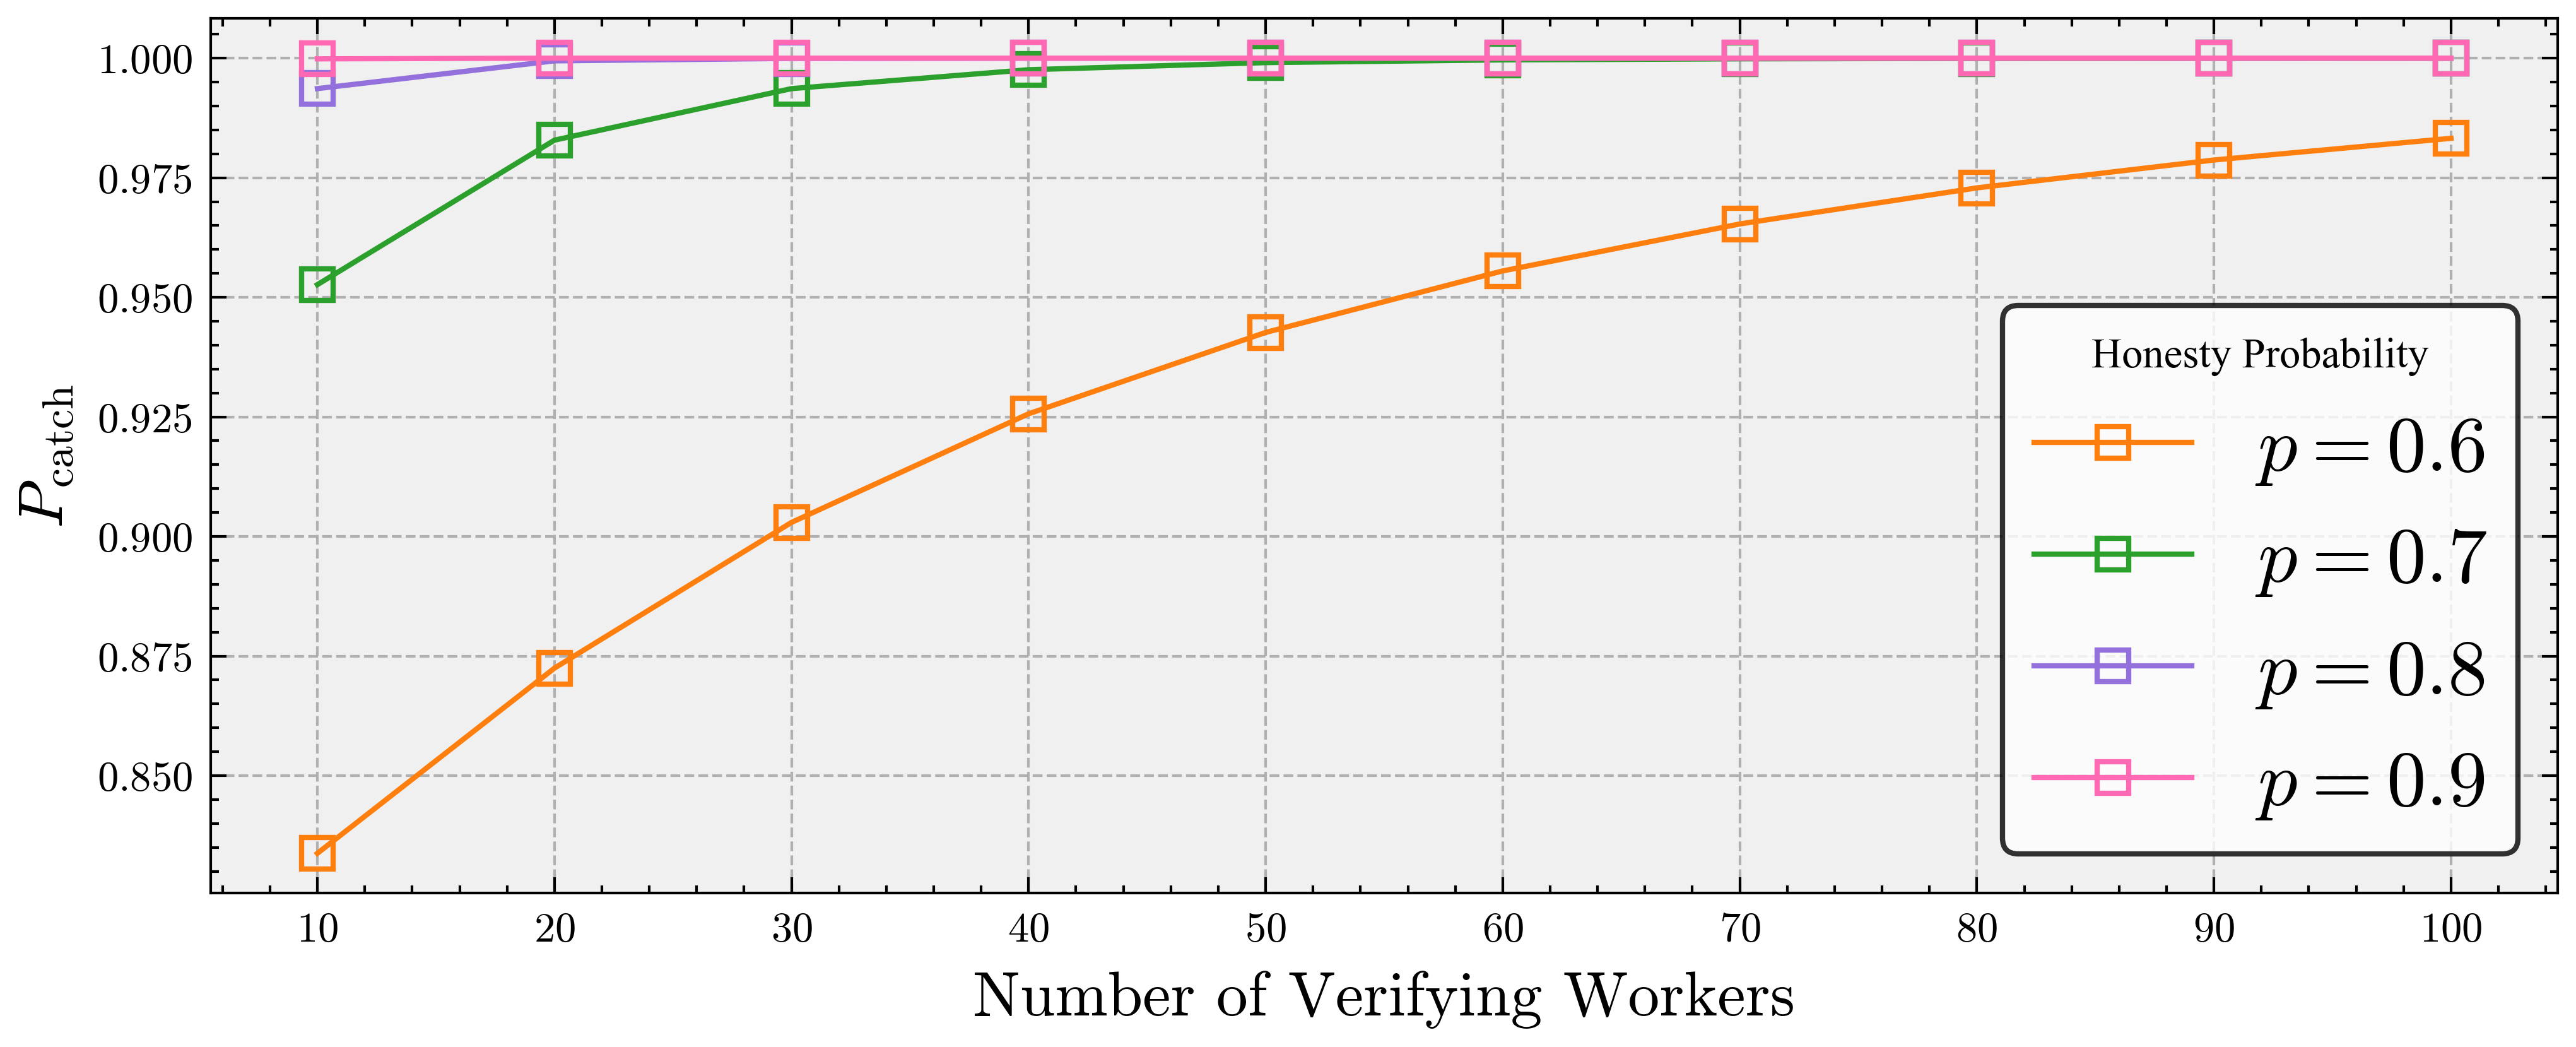

In [5]:
n_values = np.arange(10, 101, 10)
p_values = [0.5, 0.6, 0.7, 0.8, 0.9]  # probabilities of a worker being honest

def compute_p_catch(p, n):
    # min number of honest workers needed to catch collusion
    min_honest_workers = int(np.ceil(n / 2))
    # cumulative probability for having at least min_honest_workers honest workers
    P_catch = binom.sf(min_honest_workers - 1, n, p)  # sf is 1 - cdf for at least min_honest_workers
    return P_catch

lines = [
    # {"p": 0.5, "color": "#1f77b4", "marker": "s", "legend": "$p = 0.5$", "linestyle": "-", "markersize": 6},
    {"p": 0.6, "color": "#ff7f0e", "marker": "s", "legend": "$p = 0.6$", "linestyle": "-", "markersize": 6},
    {"p": 0.7, "color": "#2ca02c", "marker": "s", "legend": "$p = 0.7$", "linestyle": "-", "markersize": 6},
    {"p": 0.8, "color": "#9370DB", "marker": "s", "legend": "$p = 0.8$", "linestyle": "-", "markersize": 6},
    {"p": 0.9, "color": "#FF69B4", "marker": "s", "legend": "$p = 0.9$", "linestyle": "-", "markersize": 6},
]

with plt.style.context(['science', 'ieee', 'no-latex']):
    fig, ax = plt.subplots(figsize=(8, 3))
    plt.gca().set_facecolor('#f0f0f0')  # Set a gray background

    for line in lines:
        P_catch_values = [compute_p_catch(line["p"], n) for n in n_values]
        ax.plot(
            n_values,
            P_catch_values,
            marker=line["marker"],
            color=line["color"],
            linestyle=line["linestyle"],
            markersize=line["markersize"],
            label=line["legend"],
            fillstyle='none'
        )


    plt.rcParams['font.family'] = 'Times New Roman'
    ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5)
    ax.set_xticks(np.arange(10, 101, 10))
    ax.set_xlabel('Number of Verifying Workers', fontsize=12)
    ax.set_ylabel('$P_{\\mathrm{catch}}$', fontsize=12)
    ax.legend(title="Honesty Probability", loc='lower right', frameon=True, edgecolor='black', prop={'size': 15})
    plt.show()